<a href="https://colab.research.google.com/github/NiteshShivam/Price_Detection/blob/main/Price_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Price Detection for Real State

In [372]:
import pandas as pd

In [373]:
housing = pd.read_csv("/content/data.csv")

In [374]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [375]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [376]:
housing['CRIM'].value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [377]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [378]:
%matplotlib inline

In [379]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

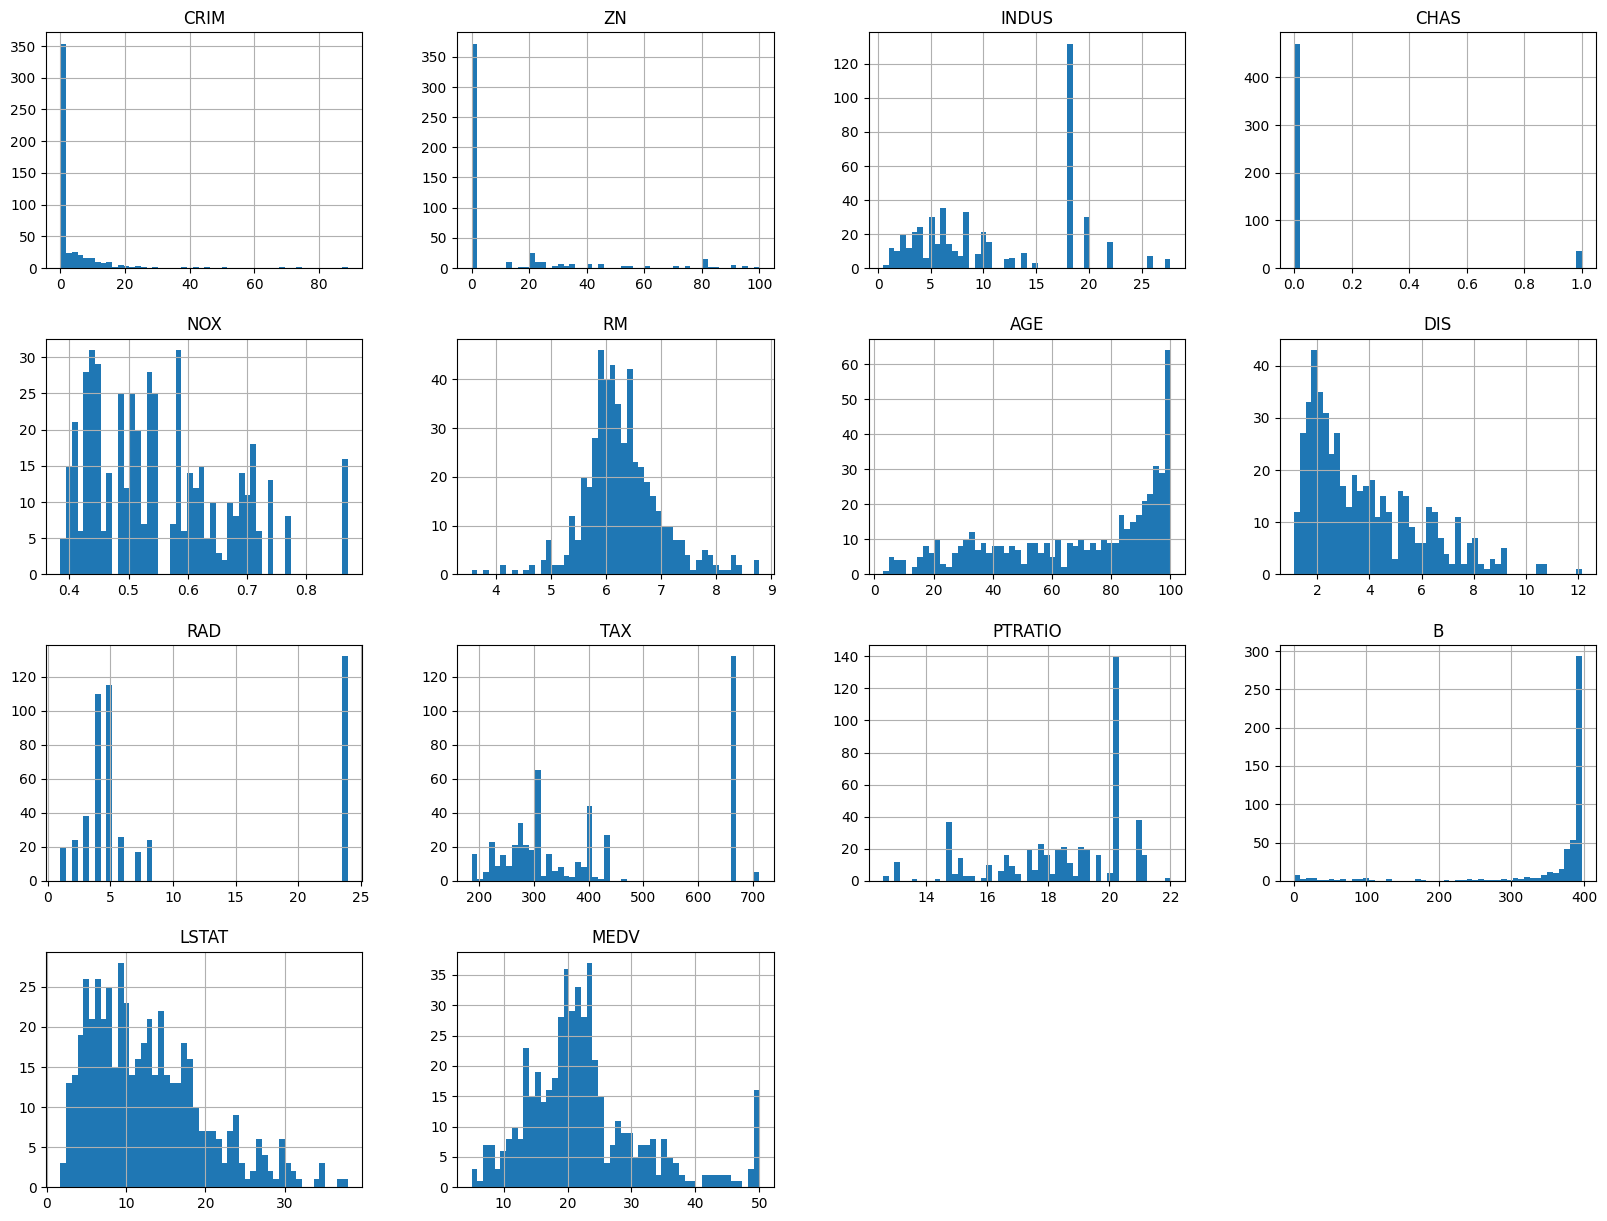

In [380]:
housing.hist(bins=50,figsize=(20,15))

## Train -test splitting

In [381]:
import numpy as np

In [382]:
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [383]:
train_set,test_set = split_train_test(housing, 0.2)

In [384]:
print(f"Rows in train set : {len(train_set)}")
print(f"Rows in test_set : {len(test_set)}")

Rows in train set : 405
Rows in test_set : 101


In [385]:
from sklearn.model_selection import train_test_split

In [386]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [387]:
print(f"Rows in train set : {len(train_set)}")
print(f"Rows in test_set : {len(test_set)}")

Rows in train set : 404
Rows in test_set : 102


In [388]:
from sklearn.model_selection import StratifiedShuffleSplit

In [389]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=43)

In [390]:
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [391]:
housing = strat_train_set.copy()

# Correlations

In [392]:
corr_matrix = housing.corr()

In [393]:
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.192312  0.399483 -0.058937  0.411448 -0.216013  0.344127   
ZN      -0.192312  1.000000 -0.524042 -0.020570 -0.509695  0.329062 -0.574310   
INDUS    0.399483 -0.524042  1.000000  0.027133  0.750267 -0.421270  0.648184   
CHAS    -0.058937 -0.020570  0.027133  1.000000  0.071087  0.103521  0.045986   
NOX      0.411448 -0.509695  0.750267  0.071087  1.000000 -0.314770  0.737355   
RM      -0.216013  0.329062 -0.421270  0.103521 -0.314770  1.000000 -0.278769   
AGE      0.344127 -0.574310  0.648184  0.045986  0.737355 -0.278769  1.000000   
DIS     -0.375319  0.659808 -0.707622 -0.079871 -0.770886  0.222369 -0.755426   
RAD      0.630256 -0.297013  0.573875 -0.004896  0.592407 -0.233069  0.442123   
TAX      0.588836 -0.300211  0.689446 -0.049830  0.649784 -0.316188  0.496017   
PTRATIO  0.284095 -0.387293  0.377392 -0.105274  0.173382 -0.383113  0.249686   
B       -0.335923  0.172807 

In [394]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.703308
ZN         0.376261
B          0.310947
DIS        0.251014
CHAS       0.144420
RAD       -0.359158
CRIM      -0.370124
AGE       -0.387703
NOX       -0.415093
TAX       -0.454164
INDUS     -0.492117
PTRATIO   -0.502687
LSTAT     -0.733197
Name: MEDV, dtype: float64

In [395]:
from pandas.plotting import scatter_matrix

In [396]:
attributes = ["MEDV","RM","ZN","LSTAT"]

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

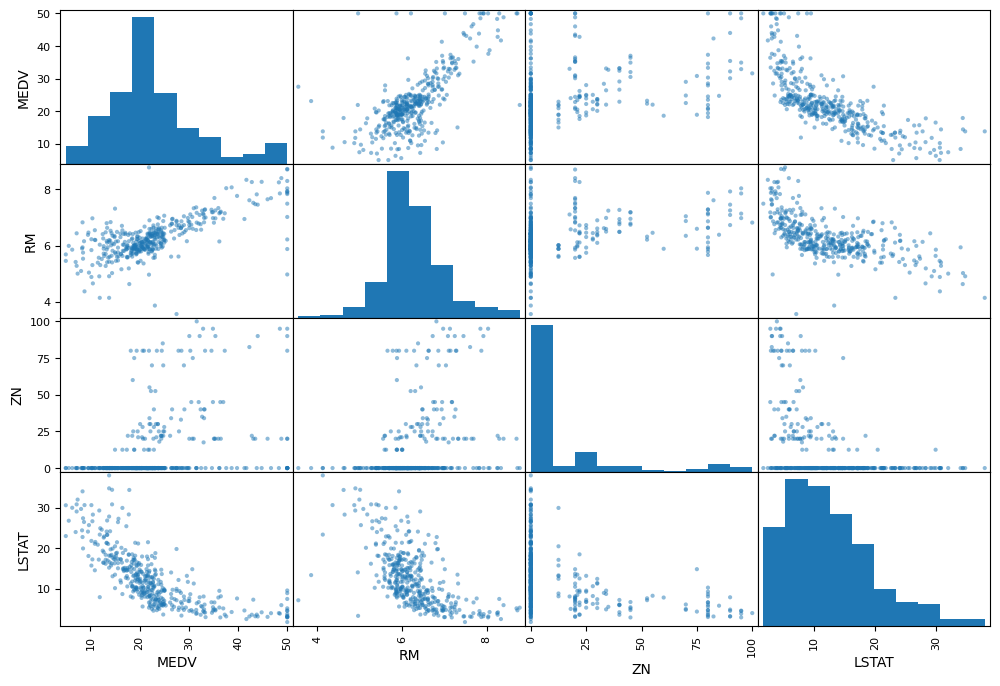

In [397]:
scatter_matrix(housing[attributes],figsize=(12,8))

#attributes

In [398]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [399]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3,45.148895
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9,57.634409
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5,65.828161
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,34.204982
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0,50.845050


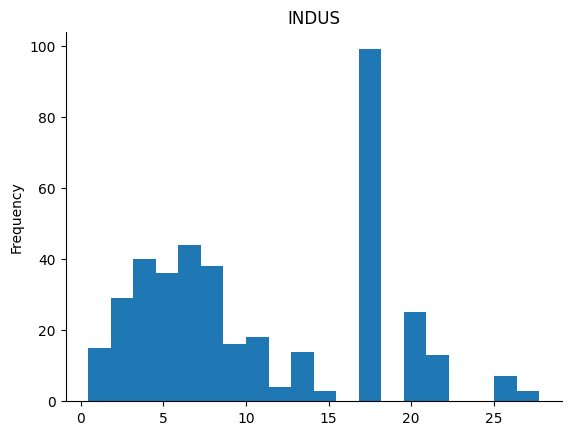

In [400]:
# @title INDUS

from matplotlib import pyplot as plt
housing['INDUS'].plot(kind='hist', bins=20, title='INDUS')
plt.gca().spines[['top', 'right',]].set_visible(False)

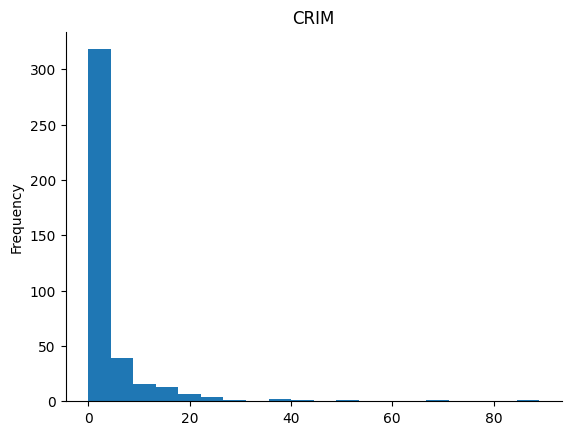

In [401]:
# @title CRIM

from matplotlib import pyplot as plt
housing['CRIM'].plot(kind='hist', bins=20, title='CRIM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [402]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.703308
ZN         0.376261
B          0.310947
DIS        0.251014
CHAS       0.144420
RAD       -0.359158
CRIM      -0.370124
AGE       -0.387703
NOX       -0.415093
TAX       -0.454164
INDUS     -0.492117
PTRATIO   -0.502687
TAXRM     -0.523860
LSTAT     -0.733197
Name: MEDV, dtype: float64

In [403]:
housing = strat_test_set.drop("MEDV",axis=1)

In [404]:
housing_labels = strat_test_set["MEDV"].copy()

In [405]:
# @title Missing Attributes

In [406]:
a = housing.dropna(subset=['RM'])
a.shape

(101, 13)

In [407]:
median = housing['RM'].median()

In [408]:
housing["RM"].fillna(median)

70     6.417
235    6.086
444    5.854
401    6.343
193    6.800
       ...  
334    6.310
214    5.412
163    8.375
147    4.926
465    5.759
Name: RM, Length: 102, dtype: float64

In [409]:
housing.shape

(102, 13)

In [410]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.502657,11.093137,11.400392,0.068627,0.563291,6.319703,68.674510,3.751197,10.696078,431.294118,18.784314,348.856176,13.091471
std,9.755364,21.593193,6.876680,0.254068,0.118717,0.628233,30.261745,2.052343,9.354185,180.122653,1.914548,98.716463,7.346001
min,0.014390,0.000000,1.690000,0.000000,0.385000,4.519000,6.200000,1.344900,1.000000,193.000000,13.000000,0.320000,1.920000
25%,0.076148,0.000000,5.145000,0.000000,0.461000,5.966000,42.125000,2.164125,4.000000,281.750000,17.800000,369.110000,6.727500
50%,0.418865,0.000000,9.900000,0.000000,0.538000,6.251000,81.900000,3.417800,5.000000,360.500000,19.200000,388.535000,12.535000
75%,5.612770,18.125000,18.100000,0.000000,0.653000,6.655000,95.525000,4.758225,24.000000,666.000000,20.200000,395.232500,18.115000
max,73.534100,85.000000,27.740000,1.000000,0.871000,8.375000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


In [411]:
from sklearn.impute import SimpleImputer

In [412]:
imputer = SimpleImputer(strategy="median")

In [413]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [414]:
imputer.statistics_.shape

(13,)

In [415]:
X = imputer.transform(housing)

In [416]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [417]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.502657,11.093137,11.400392,0.068627,0.563291,6.319029,68.674510,3.751197,10.696078,431.294118,18.784314,348.856176,13.091471
std,9.755364,21.593193,6.876680,0.254068,0.118717,0.625152,30.261745,2.052343,9.354185,180.122653,1.914548,98.716463,7.346001
min,0.014390,0.000000,1.690000,0.000000,0.385000,4.519000,6.200000,1.344900,1.000000,193.000000,13.000000,0.320000,1.920000
25%,0.076148,0.000000,5.145000,0.000000,0.461000,5.970250,42.125000,2.164125,4.000000,281.750000,17.800000,369.110000,6.727500
50%,0.418865,0.000000,9.900000,0.000000,0.538000,6.251000,81.900000,3.417800,5.000000,360.500000,19.200000,388.535000,12.535000
75%,5.612770,18.125000,18.100000,0.000000,0.653000,6.653500,95.525000,4.758225,24.000000,666.000000,20.200000,395.232500,18.115000
max,73.534100,85.000000,27.740000,1.000000,0.871000,8.375000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


In [418]:
# @title Creating a Pipeline

In [419]:
from sklearn.pipeline import Pipeline

In [420]:
from sklearn.preprocessing import StandardScaler

In [421]:
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
     ('std_scaler',StandardScaler()),
     ])

In [422]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [423]:
housing_num_tr.shape

(102, 13)

In [424]:
# @title selecting desired model

In [425]:
from sklearn.linear_model import LinearRegression

In [426]:
from sklearn.tree import DecisionTreeRegressor

In [427]:
from sklearn.ensemble import RandomForestRegressor

In [428]:
model = RandomForestRegressor()

In [429]:
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [430]:
some_data = housing.iloc[:5]

In [431]:
some_labels = housing_labels.iloc[:5]

In [432]:
prepared_data = my_pipeline.transform(some_data)

In [433]:
model.predict(prepared_data)

array([23.909, 22.758, 11.007,  9.198, 30.174])

In [434]:
some_labels

70     24.2
235    24.0
444    10.8
401     7.2
193    31.1
Name: MEDV, dtype: float64

In [435]:
# @title evaluating the model

In [436]:
from sklearn.metrics import mean_squared_error

In [437]:
housing_predictions = model.predict(housing_num_tr)

In [438]:
mse = mean_squared_error(housing_labels,housing_predictions)

In [439]:
rmse = np.sqrt(mse)

In [440]:
rmse

1.4562024712432347

#Using Cross Validation

In [441]:
from sklearn.model_selection import cross_val_score

In [442]:
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [443]:
rmse_scores = np.sqrt(-scores)

In [444]:
rmse_scores

array([2.75734775, 4.14659804, 3.59621616, 1.65198478, 3.24625701,
       4.08210779, 2.48399368, 2.94119408, 3.52105831, 7.68965698])

In [445]:
def print_scores(scores):
  print("Scores = ", scores)
  print("Mean: :",scores.mean())
  print("Standard deviation: ",scores.std())

In [446]:
print_scores(rmse_scores)

Scores =  [2.75734775 4.14659804 3.59621616 1.65198478 3.24625701 4.08210779
 2.48399368 2.94119408 3.52105831 7.68965698]
Mean: : 3.611641457202636
Standard deviation:  1.5352797124707631


#Saving the Model

In [447]:
from joblib import dump , load

In [448]:
dump(model,'Price.joblib')

['Price.joblib']

##Model TEsting

In [449]:
X_test = strat_test_set.drop("MEDV",axis=1)

In [450]:
Y_test = strat_test_set["MEDV"].copy()

In [451]:
X_test_prepared = my_pipeline.transform(X_test)

In [452]:
final_predictions = model.predict(X_test_prepared)

In [453]:
final_mse = mean_squared_error(Y_test,final_predictions)

In [454]:
final_rmse = np.sqrt(final_mse)

In [455]:
final_rmse

1.4562024712432347

In [456]:
final_predictions

array([23.909, 22.758, 11.007,  9.198, 30.174, 17.971, 21.925, 20.225,
       18.981, 18.59 , 15.062, 21.029, 25.431, 22.987, 23.021, 22.919,
       16.108, 42.497, 18.883, 18.785, 25.454, 23.814, 15.287, 11.78 ,
       18.115,  7.98 , 10.143, 13.562, 15.525, 19.931, 30.63 , 21.243,
       29.302, 24.784, 35.52 , 23.175, 21.703, 19.741, 32.463, 23.597,
       20.036, 31.967, 31.103, 34.101, 19.755, 28.272, 23.413, 24.719,
       15.778, 19.597, 25.862, 33.598, 32.825, 24.424, 11.934, 19.017,
       12.557, 27.329, 37.004, 31.354, 14.509, 19.527, 14.415, 20.386,
       15.281, 10.637, 16.761, 24.784, 12.412, 16.553,  8.844, 19.483,
       18.15 , 29.159, 19.186, 11.805, 25.423, 24.255, 15.034, 14.211,
        8.856, 22.853, 33.145, 18.274, 24.797, 33.705, 14.288, 16.701,
       48.827, 20.804, 13.918, 18.978, 20.951, 19.763, 40.597, 24.799,
       20.519, 22.097, 21.897, 47.842, 14.989, 19.422])

In [459]:
list(Y_test)

[24.2,
 24.0,
 10.8,
 7.2,
 31.1,
 16.0,
 23.0,
 20.4,
 19.5,
 18.4,
 14.6,
 19.8,
 24.1,
 23.3,
 23.1,
 22.9,
 15.3,
 45.4,
 19.9,
 17.1,
 24.6,
 23.9,
 13.6,
 11.3,
 16.1,
 7.0,
 7.5,
 13.9,
 15.6,
 20.1,
 28.7,
 20.5,
 29.8,
 25.2,
 37.2,
 23.2,
 21.2,
 19.3,
 33.2,
 23.1,
 20.1,
 33.8,
 29.6,
 34.9,
 19.4,
 28.2,
 23.4,
 24.8,
 15.2,
 18.2,
 26.6,
 36.1,
 32.0,
 27.1,
 12.1,
 19.1,
 11.7,
 28.7,
 37.9,
 31.2,
 14.9,
 20.0,
 13.5,
 20.6,
 17.2,
 10.5,
 17.2,
 24.1,
 13.1,
 17.8,
 8.3,
 19.6,
 20.8,
 29.1,
 17.8,
 11.8,
 25.0,
 25.0,
 13.2,
 14.1,
 8.8,
 23.1,
 31.7,
 18.1,
 22.0,
 33.4,
 13.4,
 16.7,
 50.0,
 21.0,
 13.0,
 20.1,
 21.2,
 20.1,
 50.0,
 23.9,
 19.4,
 20.7,
 23.7,
 50.0,
 14.6,
 19.9]